# *Problem Statement & Approach :*
 We have a dataset of Boston house prices with some features. Our task is to  to make a model which can give us a good prediction on the price of the house based on the features. We are going to use Linear Regression, Decision Tree Regressor and Random Forest Regressor for this dataset and evaluate these models based on the performace metrics.

## Dataset Features

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $ 10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

## *Importing Libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

# *Importing Data* 

In [2]:
housing = pd.read_csv(r"../input/housing-data/Data.csv")

In [3]:
housing.head()#overview of data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#shape of data 
housing.shape

(506, 14)

There are 506 observations of 13 features with a target column price.

In [5]:
#rename the column MEDV 
housing.rename(columns={"MEDV":"Price"}, inplace=True)

In [6]:
# To see the columns
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [7]:
#check for null values
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## **Exploratory Data Analysis:** 

In [8]:
housing.info()#summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
housing.describe()#statistical summary of dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
housing['CHAS'].value_counts()#categorical variable

0    471
1     35
Name: CHAS, dtype: int64

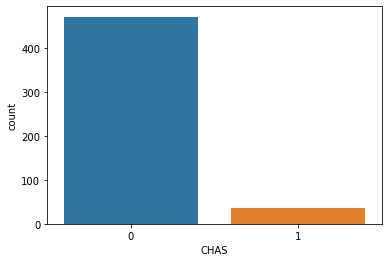

In [11]:
#visualisation of CHAS values
sns.countplot(x="CHAS",data=housing)

## *Feature Observation:*

In [12]:
#corelation b/w columns
corr_matrix=housing.corr()

In [13]:
#here we see the correlation of other features with Price
corr_matrix['Price'].sort_values(ascending=False)

Price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

##### As we can see that RM has high positive correlation with Price and  LSTAT has negative correlation with Price. We can see these correlation through visualisation also.

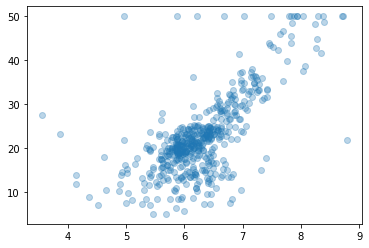

In [14]:
plt.scatter(housing['RM'],housing['Price'],alpha=0.3)#high positive corelation

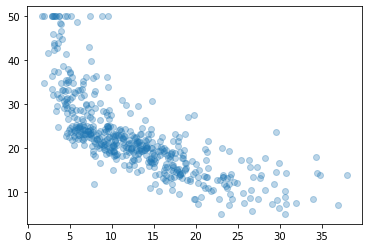

In [15]:
plt.scatter(housing['LSTAT'],housing['Price'],alpha=0.3)# high negative correlation

## Feature Engineering

In [16]:
#we create a new column using another two columns
housing['RMTAX']=housing['RM']/housing['TAX']

In [17]:
housing.head()#check for new added column

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,RMTAX
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.022213
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.026533
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.029690
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.031523
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.032194


In [18]:
# correlation after adding new coulmn and we can see that RMTAX has a good positive correlation 
corr_matrix=housing.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price      1.000000
RM         0.695360
RMTAX      0.625102
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

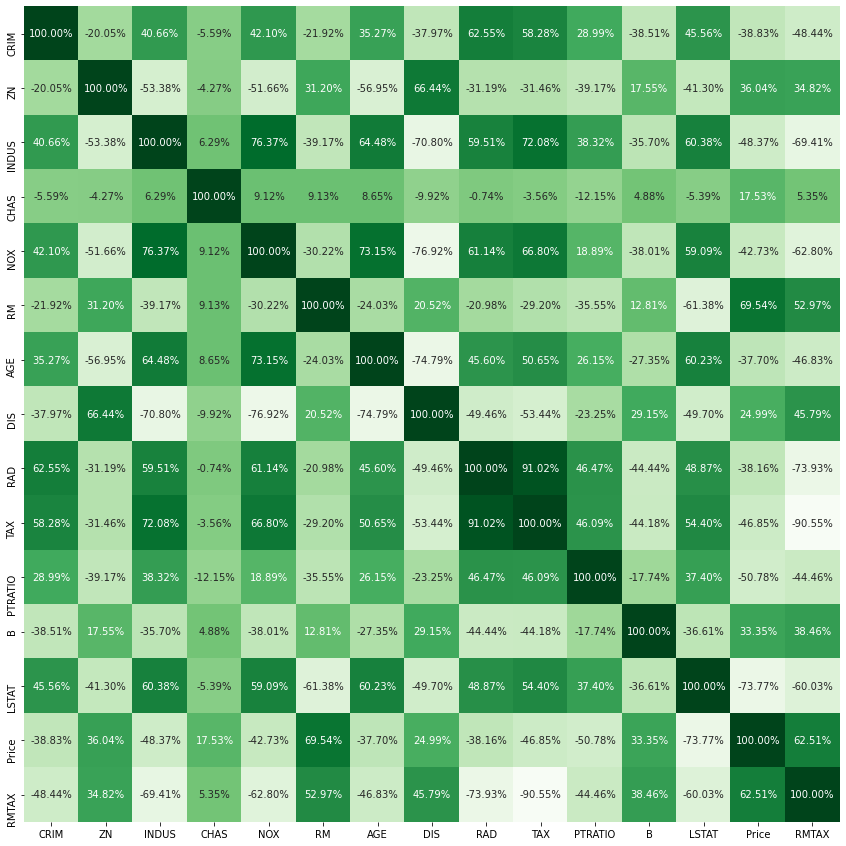

In [19]:
#plotting the heatmap of correlation between features
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cbar=False, square= True, fmt=".2%", annot=True, cmap="Greens")

# *Train Test split  the dataset*

In [20]:
from sklearn.model_selection import train_test_split #import library for train_test_split

In [21]:
X=housing.drop('Price',axis=1)#independent variable
y=housing['Price'].copy()#target variable

In [22]:
#split the dataset
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Shape of split data:

In [23]:
X_train.shape

(404, 14)

In [24]:
X_test.shape

(102, 14)

In [25]:
y_train.shape

(404,)

In [26]:
y_test.shape

(102,)

# Trying different models


## *1. Linear Regression*

In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()#create the model
model.fit(X_train,y_train)#fit the model

LinearRegression()

In [28]:
# predict the model
y_pred = model.predict(X_test) 

In [29]:
#Accuracy of model
regTrain_score=model.score(X_train,y_train)*100
regTest_score=model.score(X_test,y_test)*100
print("Training Accuracy : ",regTrain_score)
print("Testing Accuracy : ",regTest_score)

Training Accuracy :  76.70860442912466
Testing Accuracy :  68.5242734235767


# *Model evaluation*

In [30]:
#we use here MAE, MSE & RMSE for model evaluation 
Reg_mse = metrics.mean_squared_error(y_test, y_pred) 
Reg_rmse=np.sqrt(Reg_mse)
Reg_mae=metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", Reg_mae)
print("Mean Square Error : ",Reg_mse) 
print("Root Mean Square Error : ",Reg_rmse) 

Mean Absolute Error:  3.138763883804843
Mean Square Error :  23.08234107569041
Root Mean Square Error :  4.8044085042479905


# *Model Visualisation*

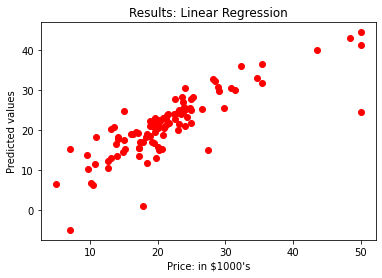

In [31]:
# Plotting Scatter graph to show the results between true values and predicted values
plt.scatter(y_test, y_pred, c = 'red') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted values") 
plt.title("Results: Linear Regression") 
plt.show() 

## *2. Decision Tree*

In [32]:
from sklearn.tree import DecisionTreeRegressor 
Des_Tree = DecisionTreeRegressor(random_state = 0) #create the Des_Tree object
# fit the regressor with X and Y data 
Des_Tree.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [33]:
# predict the Des_Tree Model
y_pred = Des_Tree.predict(X_test) 

In [34]:
#Accuracy of model
DesTrain_score=Des_Tree.score(X_train,y_train)*100
DesTest_score=Des_Tree.score(X_test,y_test)*100
print("Training Accuracy : ",DesTrain_score)
print("Testing Accuracy : ",DesTest_score)

Training Accuracy :  100.0
Testing Accuracy :  85.78551499920023


# *Model evaluation*

In [35]:
#we use here MAE, MSE & RMSE for model evaluation 
Des_mse = metrics.mean_squared_error(y_test, y_pred) 
Des_rmse=np.sqrt(Des_mse)
Des_mae=metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", Des_mae)
print("Mean Square Error : ",Des_mse) 
print("Root Mean Square Error : ",Des_rmse) 

Mean Absolute Error:  2.3911764705882352
Mean Square Error :  10.424019607843137
Root Mean Square Error :  3.2286250336394184


# *Model Visualisation*

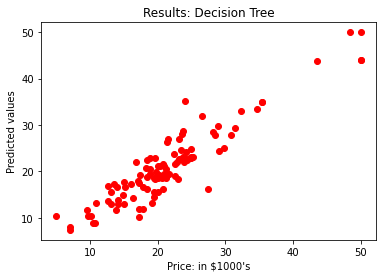

In [36]:
# Plotting Scatter graph to show the results between true values and predicted values
plt.scatter(y_test, y_pred, c = 'red') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted values") 
plt.title("Results: Decision Tree") 
plt.show() 

## *3. Random Forest*

In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) #create the object

In [38]:
regressor.fit(X_train, y_train)  # fit the object

RandomForestRegressor(random_state=0)

In [39]:
y_pred=regressor.predict(X_test)# predict the regressor

In [40]:
#Accuracy of model
Random_Train_score=regressor.score(X_train,y_train)*100
Random_Test_score=regressor.score(X_test,y_test)*100
print("Training Accuracy : ",Random_Train_score)
print("Testing Accuracy : ",Random_Test_score)

Training Accuracy :  97.46383075852975
Testing Accuracy :  87.89216230428909


# *Model Evaluation*

In [41]:
#we use here MAE, MSE & RMSE for model evaluation 
Random_mse = metrics.mean_squared_error(y_test, y_pred) 
Random_rmse=np.sqrt(Random_mse)
Random_mae=metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", Random_mae)
print("Mean Square Error : ",Random_mse) 
print("Root Mean Square Error : ",Random_rmse) 

Mean Absolute Error:  2.1287156862745107
Mean Square Error :  8.87913544117648
Root Mean Square Error :  2.9797878181468693


# *Model Visualisation*

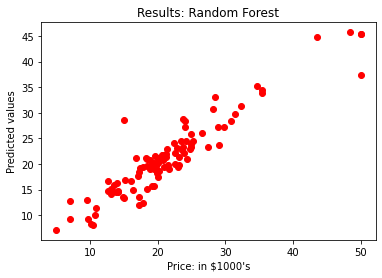

In [42]:
# Plotting Scatter graph to show the results between true values and predicted values
plt.scatter(y_test, y_pred, c = 'red') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted values") 
plt.title("Results: Random Forest") 
plt.show() 

### ***Comparing all the models:***

In [43]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree','Random Forest'],
    'RMSE': [Reg_rmse, Des_rmse, Random_rmse],'Test_Accuracy': [regTest_score,DesTest_score,Random_Test_score]})
models.sort_values(by='RMSE', ascending=False)

,Model,RMSE,Test_Accuracy
0,Linear Regression,4.804409,68.524273
1,Decision Tree,3.228625,85.785515
2,Random Forest,2.979788,87.892162


**From above comparison we can say that Random Forest is more suitable for price prediction between all three models.**